<a href="https://colab.research.google.com/github/amirtha5591/Neural-Network-Regression-Model/blob/main/DLex01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Loss: 5978.294922
Epoch [0/2000], Loss: 2624.471924
Epoch [200/2000], Loss: 1803.610718
Epoch [400/2000], Loss: 737.490723
Epoch [600/2000], Loss: 204.424194
Epoch [800/2000], Loss: 115.030022
Epoch [1000/2000], Loss: 51.997803
Epoch [1200/2000], Loss: 13.213824
Epoch [1400/2000], Loss: 1.085106
Epoch [1600/2000], Loss: 0.011382
Epoch [1800/2000], Loss: 0.005049


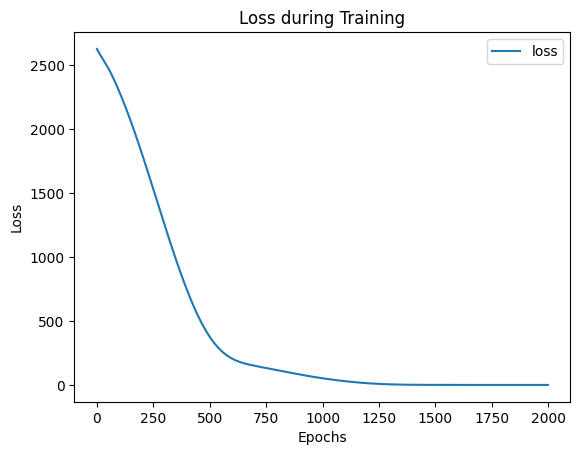

Prediction: 90.35429382324219


In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dataset1 = pd.read_csv('/content/dataset.csv')
X = dataset1[['x']].values
y = dataset1[['y']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 12)
        self.fc2 = nn.Linear(12, 10)
        self.fc3 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

  def forward(self, x):
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    x = self.fc3(x)
    return x



# Initialize the Model, Loss Function, and Optimizer
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(),lr=0.001)


def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    ai_brain.history = {'loss': []}
    history = {'loss': []}
    for epoch in range(epochs):
        y_pred = ai_brain(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        history['loss'].append(loss.item())
        if epoch % 200 == 0:
          print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')
    return history

with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

history = train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

loss_df = pd.DataFrame(history)

import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')
